In [1]:
from pathlib import Path
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import display
from collections import OrderedDict
from torchinfo import summary


In [28]:
PRED_COLUMN = 'mu' # mu or lambda

In [29]:
df_train = pd.read_pickle('my_df_train_%s.pickle'%(PRED_COLUMN))
df_test = pd.read_pickle('my_df_test_%s.pickle'%(PRED_COLUMN))
df_train


,lat,lon,year_month,inj_vol,pp,prev_mu,mu
0,96.8,36.4,2013.75,"[[1.27961, 0.0, 1.04539, 1.39446, 0.0], [1.641...","[[4.7918579999999995, 0.0, 3.998961, 13.706794...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.06149
1,96.8,36.4,2013.83,"[[1.64186, 0.0, 1.35435, 1.53389, 0.0], [1.484...","[[6.694805000000001, 0.0, 5.03317, 13.989468, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.06149
2,96.8,36.4,2013.92,"[[1.48419, 0.0, 1.22722, 1.64158, 0.0], [1.232...","[[6.784442, 0.0, 5.17107, 13.589576000000001, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.06149
3,96.8,36.4,2014.00,"[[1.2328, 0.0, 1.2093, 0.879274, 0.0], [1.1951...","[[6.9361299999999995, 0.0, 5.8329699999999995,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.06149
4,96.8,36.4,2014.08,"[[1.19517, 0.0, 1.21349, 0.907414, 0.0], [1.42...","[[6.97061, 0.0, 5.8329699999999995, 13.237946,...","[nan, nan, nan, nan, nan, nan, nan, nan, 0.061...",0.06149
...,...,...,...,...,...,...,...
57,96.8,35.4,2016.75,"[[2.62944, 0.0, 0.0, 0.0, 1.01359], [2.54863, ...","[[15.7959, 0.0, 0.0, 0.0, 7.901400000000001], ...","[0.01202, 0.01202, 0.01202, 0.01202, 0.01202, ...",0.01202
58,96.8,35.4,2016.83,"[[2.54863, 0.0, 0.0, 0.0, 0.963827], [2.65437,...","[[16.1889, 0.0, 0.0, 0.0, 8.294400000000001], ...","[0.01202, 0.01202, 0.01202, 0.01202, 0.01202, ...",0.01202
59,96.8,35.4,2016.92,"[[2.65437, 0.0, 0.0, 0.0, 1.07463], [2.62847, ...","[[16.48538, 0.0, 0.0, 0.0, 8.59088], [13.83779...","[0.01202, 0.01202, 0.01202, 0.01202, 0.01202, ...",0.01202
60,96.8,35.4,2017.00,"[[2.62847, 0.0, 0.0, 0.0, 1.04501], [2.43947, ...","[[13.83779, 0.0, 0.0, 0.0, 8.59088], [13.62405...","[0.01202, 0.01202, 0.01202, 0.01202, 0.01202, ...",0.01202


In [30]:
for x in df_train.groupby(['lat','lon']):
    print(x[1])
    break

     lat   lon  year_month                                            inj_vol  \
0   96.6  35.6     2012.00  [[0.206679, 0.0, 0.206679, 0.0, 0.0], [0.11376...   
1   96.6  35.6     2012.08  [[0.113768, 0.0, 0.113768, 0.0, 0.0], [0.19276...   
2   96.6  35.6     2012.17  [[0.192769, 0.0, 0.192769, 0.0, 0.0], [0.19855...   
3   96.6  35.6     2012.25  [[0.198553, 0.0, 0.198553, 0.0, 0.0], [0.22677...   
4   96.6  35.6     2012.33  [[0.226778, 0.0, 0.226778, 0.0, 0.0], [0.20887...   
..   ...   ...         ...                                                ...   
59  96.6  35.6     2016.92  [[1.05857, 0.0, 1.07463, 0.0, 0.0], [1.03145, ...   
60  96.6  35.6     2017.00  [[1.03145, 0.0, 1.04501, 0.0, 0.0], [0.964039,...   
61  96.6  35.6     2017.08  [[0.964039, 0.0, 0.965293, 0.0, 0.0], [0.91054...   
62  96.6  35.6     2017.17  [[0.910541, 0.0, 0.911088, 0.0, 0.0], [0.82131...   
63  96.6  35.6     2017.25  [[0.821311, 0.0, 0.821828, 0.0, 0.0], [0.71699...   

                           

In [31]:
for x in df_test.groupby(['lat','lon']):
    print(x[1])
    break

     lat   lon  year_month                                            inj_vol  \
0   96.6  35.6     2017.33  [[0.716998, 0.0, 0.717665, 0.0, 0.0], [0.65129...   
1   96.6  35.6     2017.42  [[0.651291, 0.0, 0.652381, 0.0, 0.0], [0.82427...   
2   96.6  35.6     2017.50  [[0.824271, 0.0, 0.842561, 0.0, 0.0], [0.79525...   
3   96.6  35.6     2017.58  [[0.795251, 0.0, 0.814926, 0.0, 0.0], [0.76603...   
4   96.6  35.6     2017.67  [[0.766037, 0.0, 0.782973, 0.0, 0.0], [0.72489...   
5   96.6  35.6     2017.75  [[0.724893, 0.0, 0.726047, 0.0, 0.0], [0.73737...   
6   96.6  35.6     2017.83  [[0.737372, 0.0, 0.738521, 0.0, 0.0], [0.73129...   
7   96.6  35.6     2017.92  [[0.731299, 0.0, 0.732319, 0.0, 0.0], [0.75154...   
8   96.6  35.6     2018.00  [[0.751546, 0.0, 0.752779, 0.0, 0.0], [0.71358...   
9   96.6  35.6     2018.08  [[0.713581, 0.0, 0.714554, 0.0, 0.0], [0.71031...   
10  96.6  35.6     2018.17  [[0.710311, 0.0, 0.719063, 0.0, 0.0], [0.63506...   
11  96.6  35.6     2018.25  

In [32]:
x = {x[0] for x in df_train.groupby(['lat','lon'])}
len(x)

46

In [33]:
x = {x[0] for x in df_test.groupby(['lat','lon'])}
len(x)

46

In [35]:
# train
inj_vol = np.stack(df_train['inj_vol'].values)
inj_vol = inj_vol.reshape(*inj_vol.shape[:-2], -1)
pp = np.stack(df_train['pp'].values)
pp = pp.reshape(*pp.shape[:-2], -1)
lat = np.stack(df_train['lat'].values)
lat = np.reshape(lat,(-1,1))
lon = np.stack(df_train['lon'].values)
lon = np.reshape(lon,(-1,1))


# (2814, 1) (2814, 1) (2814, 12, 1) (2814, 12, 1)
# (2513, 1) (2513, 1) (2513, 12, 5) (2513, 12, 5)
# dim: 2814 x 24
x_train = np.concatenate([lat, lon, inj_vol, pp], axis =1)
y_train = df_train[PRED_COLUMN].values

# test
inj_vol = np.stack(df_test['inj_vol'].values)
inj_vol = inj_vol.reshape(*inj_vol.shape[:-2], -1)
pp = np.stack(df_test['pp'].values)
pp = pp.reshape(*pp.shape[:-2], -1)
lat = np.stack(df_test['lat'].values)
lat = np.reshape(lat,(-1,1))
lon = np.stack(df_test['lon'].values)
lon = np.reshape(lon,(-1,1))

print(lat.shape,lon.shape,inj_vol.shape,pp.shape)
# dim: _ x 24
x_test = np.concatenate([lat, lon, inj_vol, pp], axis =1)
y_test = df_test[PRED_COLUMN].values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(726, 1) (726, 1) (726, 60) (726, 60)
(2498, 122) (2498,)
(726, 122) (726,)


In [36]:
import torch 
from torch import nn

class Feedforward(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Feedforward, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        # create layers
        self.fc1 = nn.Linear(self.input_size, self.hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(self.hidden_size, 1)
        
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        return output

In [37]:
# convert train test data to torch tensors
X_train = torch.from_numpy(x_train.astype('float32'))
Y_train = torch.from_numpy(np.expand_dims(y_train, axis=-1).astype('float32'))
X_test = torch.from_numpy(x_test.astype('float32'))
Y_test = torch.from_numpy(np.expand_dims(y_test, axis=-1).astype('float32'))

In [38]:
print(X_train.shape, Y_train.shape, X_train.dtype, Y_train.dtype)
print(X_test.shape, Y_test.shape, X_test.dtype, Y_test.dtype)


torch.Size([2498, 122]) torch.Size([2498, 1]) torch.float32 torch.float32
torch.Size([726, 122]) torch.Size([726, 1]) torch.float32 torch.float32


In [39]:
# set random seed for initializing model weights
torch.manual_seed(12345)
model = Feedforward(x_train.shape[1], 32)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)


In [40]:
x_train.shape

(2498, 122)

In [42]:
summary(model, input_size=x_train.shape)


Layer (type:depth-idx)                   Output Shape              Param #
Feedforward                              --                        --
├─Linear: 1-1                            [2498, 32]                3,936
├─ReLU: 1-2                              [2498, 32]                --
├─Linear: 1-3                            [2498, 1]                 33
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
Total mult-adds (M): 9.91
Input size (MB): 1.22
Forward/backward pass size (MB): 0.66
Params size (MB): 0.02
Estimated Total Size (MB): 1.89

In [43]:
model.train()
loss_train_array = []
loss_test_array = []
epoch = 2500
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    loss_train = loss_fn(model(X_train), Y_train)
    loss_train_array.append(loss_train.detach().numpy())
    loss_test = loss_fn(model(X_test), Y_test)
    loss_test_array.append(loss_test.detach().numpy())

   
    print('Epoch %s: train loss: %6.4f, test loss %6.4f'%(epoch, loss_train.item(), loss_test.item()))
    # Backward pass
    loss_train.backward()
    optimizer.step()




Epoch 0: train loss: 9.4120, test loss 15.6497
Epoch 1: train loss: 111.1543, test loss 124.7440
Epoch 2: train loss: 6.7841, test loss 11.0447
Epoch 3: train loss: 34.7034, test loss 31.8792
Epoch 4: train loss: 31.6696, test loss 29.2938
Epoch 5: train loss: 14.8768, test loss 14.0846
Epoch 6: train loss: 5.1150, test loss 5.1343
Epoch 7: train loss: 1.6068, test loss 1.9604
Epoch 8: train loss: 0.7310, test loss 1.3749
Epoch 9: train loss: 0.9861, test loss 1.7151
Epoch 10: train loss: 1.3240, test loss 2.0816
Epoch 11: train loss: 1.4078, test loss 2.3004
Epoch 12: train loss: 1.3656, test loss 2.3669
Epoch 13: train loss: 1.2539, test loss 2.2914
Epoch 14: train loss: 1.1013, test loss 2.1164
Epoch 15: train loss: 0.9335, test loss 1.9006
Epoch 16: train loss: 0.7688, test loss 1.6718
Epoch 17: train loss: 0.6195, test loss 1.4460
Epoch 18: train loss: 0.4925, test loss 1.2430
Epoch 19: train loss: 0.3899, test loss 1.0625
Epoch 20: train loss: 0.3096, test loss 0.9062
Epoch 21: t

Epoch 216: train loss: 0.0249, test loss 0.0656
Epoch 217: train loss: 0.0249, test loss 0.0656
Epoch 218: train loss: 0.0249, test loss 0.0656
Epoch 219: train loss: 0.0249, test loss 0.0656
Epoch 220: train loss: 0.0249, test loss 0.0656
Epoch 221: train loss: 0.0249, test loss 0.0656
Epoch 222: train loss: 0.0249, test loss 0.0656
Epoch 223: train loss: 0.0249, test loss 0.0656
Epoch 224: train loss: 0.0248, test loss 0.0656
Epoch 225: train loss: 0.0248, test loss 0.0656
Epoch 226: train loss: 0.0248, test loss 0.0656
Epoch 227: train loss: 0.0248, test loss 0.0656
Epoch 228: train loss: 0.0248, test loss 0.0656
Epoch 229: train loss: 0.0248, test loss 0.0656
Epoch 230: train loss: 0.0248, test loss 0.0656
Epoch 231: train loss: 0.0248, test loss 0.0656
Epoch 232: train loss: 0.0248, test loss 0.0656
Epoch 233: train loss: 0.0248, test loss 0.0656
Epoch 234: train loss: 0.0248, test loss 0.0656
Epoch 235: train loss: 0.0248, test loss 0.0656
Epoch 236: train loss: 0.0248, test loss

Epoch 393: train loss: 0.0245, test loss 0.0667
Epoch 394: train loss: 0.0245, test loss 0.0667
Epoch 395: train loss: 0.0245, test loss 0.0667
Epoch 396: train loss: 0.0245, test loss 0.0667
Epoch 397: train loss: 0.0245, test loss 0.0667
Epoch 398: train loss: 0.0245, test loss 0.0667
Epoch 399: train loss: 0.0245, test loss 0.0668
Epoch 400: train loss: 0.0245, test loss 0.0668
Epoch 401: train loss: 0.0245, test loss 0.0668
Epoch 402: train loss: 0.0244, test loss 0.0668
Epoch 403: train loss: 0.0244, test loss 0.0668
Epoch 404: train loss: 0.0244, test loss 0.0668
Epoch 405: train loss: 0.0244, test loss 0.0668
Epoch 406: train loss: 0.0244, test loss 0.0668
Epoch 407: train loss: 0.0244, test loss 0.0668
Epoch 408: train loss: 0.0244, test loss 0.0669
Epoch 409: train loss: 0.0244, test loss 0.0669
Epoch 410: train loss: 0.0244, test loss 0.0669
Epoch 411: train loss: 0.0244, test loss 0.0669
Epoch 412: train loss: 0.0244, test loss 0.0669
Epoch 413: train loss: 0.0244, test loss

Epoch 656: train loss: 0.0214, test loss 0.0626
Epoch 657: train loss: 0.0214, test loss 0.0626
Epoch 658: train loss: 0.0214, test loss 0.0625
Epoch 659: train loss: 0.0214, test loss 0.0625
Epoch 660: train loss: 0.0214, test loss 0.0625
Epoch 661: train loss: 0.0214, test loss 0.0625
Epoch 662: train loss: 0.0213, test loss 0.0624
Epoch 663: train loss: 0.0213, test loss 0.0624
Epoch 664: train loss: 0.0213, test loss 0.0624
Epoch 665: train loss: 0.0213, test loss 0.0624
Epoch 666: train loss: 0.0213, test loss 0.0623
Epoch 667: train loss: 0.0213, test loss 0.0623
Epoch 668: train loss: 0.0213, test loss 0.0623
Epoch 669: train loss: 0.0212, test loss 0.0623
Epoch 670: train loss: 0.0212, test loss 0.0622
Epoch 671: train loss: 0.0212, test loss 0.0622
Epoch 672: train loss: 0.0212, test loss 0.0622
Epoch 673: train loss: 0.0212, test loss 0.0622
Epoch 674: train loss: 0.0212, test loss 0.0621
Epoch 675: train loss: 0.0212, test loss 0.0621
Epoch 676: train loss: 0.0211, test loss

Epoch 857: train loss: 0.0188, test loss 0.0553
Epoch 858: train loss: 0.0188, test loss 0.0553
Epoch 859: train loss: 0.0188, test loss 0.0552
Epoch 860: train loss: 0.0187, test loss 0.0552
Epoch 861: train loss: 0.0187, test loss 0.0552
Epoch 862: train loss: 0.0187, test loss 0.0551
Epoch 863: train loss: 0.0187, test loss 0.0551
Epoch 864: train loss: 0.0187, test loss 0.0551
Epoch 865: train loss: 0.0187, test loss 0.0551
Epoch 866: train loss: 0.0187, test loss 0.0550
Epoch 867: train loss: 0.0187, test loss 0.0550
Epoch 868: train loss: 0.0187, test loss 0.0550
Epoch 869: train loss: 0.0187, test loss 0.0550
Epoch 870: train loss: 0.0186, test loss 0.0549
Epoch 871: train loss: 0.0186, test loss 0.0549
Epoch 872: train loss: 0.0186, test loss 0.0549
Epoch 873: train loss: 0.0186, test loss 0.0548
Epoch 874: train loss: 0.0186, test loss 0.0548
Epoch 875: train loss: 0.0186, test loss 0.0548
Epoch 876: train loss: 0.0186, test loss 0.0548
Epoch 877: train loss: 0.0186, test loss

Epoch 1057: train loss: 0.0173, test loss 0.0523
Epoch 1058: train loss: 0.0173, test loss 0.0523
Epoch 1059: train loss: 0.0173, test loss 0.0523
Epoch 1060: train loss: 0.0173, test loss 0.0523
Epoch 1061: train loss: 0.0173, test loss 0.0523
Epoch 1062: train loss: 0.0173, test loss 0.0523
Epoch 1063: train loss: 0.0173, test loss 0.0522
Epoch 1064: train loss: 0.0173, test loss 0.0522
Epoch 1065: train loss: 0.0173, test loss 0.0522
Epoch 1066: train loss: 0.0173, test loss 0.0522
Epoch 1067: train loss: 0.0173, test loss 0.0522
Epoch 1068: train loss: 0.0173, test loss 0.0521
Epoch 1069: train loss: 0.0172, test loss 0.0521
Epoch 1070: train loss: 0.0172, test loss 0.0521
Epoch 1071: train loss: 0.0172, test loss 0.0521
Epoch 1072: train loss: 0.0172, test loss 0.0521
Epoch 1073: train loss: 0.0172, test loss 0.0521
Epoch 1074: train loss: 0.0172, test loss 0.0521
Epoch 1075: train loss: 0.0172, test loss 0.0521
Epoch 1076: train loss: 0.0172, test loss 0.0521
Epoch 1077: train lo

Epoch 1257: train loss: 0.0165, test loss 0.0499
Epoch 1258: train loss: 0.0165, test loss 0.0499
Epoch 1259: train loss: 0.0165, test loss 0.0499
Epoch 1260: train loss: 0.0165, test loss 0.0499
Epoch 1261: train loss: 0.0165, test loss 0.0499
Epoch 1262: train loss: 0.0165, test loss 0.0499
Epoch 1263: train loss: 0.0165, test loss 0.0499
Epoch 1264: train loss: 0.0165, test loss 0.0499
Epoch 1265: train loss: 0.0165, test loss 0.0499
Epoch 1266: train loss: 0.0165, test loss 0.0499
Epoch 1267: train loss: 0.0165, test loss 0.0499
Epoch 1268: train loss: 0.0165, test loss 0.0499
Epoch 1269: train loss: 0.0165, test loss 0.0499
Epoch 1270: train loss: 0.0165, test loss 0.0499
Epoch 1271: train loss: 0.0165, test loss 0.0499
Epoch 1272: train loss: 0.0165, test loss 0.0498
Epoch 1273: train loss: 0.0165, test loss 0.0498
Epoch 1274: train loss: 0.0165, test loss 0.0498
Epoch 1275: train loss: 0.0165, test loss 0.0498
Epoch 1276: train loss: 0.0165, test loss 0.0498
Epoch 1277: train lo

Epoch 1461: train loss: 0.0160, test loss 0.0488
Epoch 1462: train loss: 0.0160, test loss 0.0488
Epoch 1463: train loss: 0.0160, test loss 0.0488
Epoch 1464: train loss: 0.0160, test loss 0.0488
Epoch 1465: train loss: 0.0160, test loss 0.0488
Epoch 1466: train loss: 0.0160, test loss 0.0488
Epoch 1467: train loss: 0.0160, test loss 0.0488
Epoch 1468: train loss: 0.0160, test loss 0.0488
Epoch 1469: train loss: 0.0160, test loss 0.0488
Epoch 1470: train loss: 0.0160, test loss 0.0488
Epoch 1471: train loss: 0.0160, test loss 0.0488
Epoch 1472: train loss: 0.0160, test loss 0.0488
Epoch 1473: train loss: 0.0160, test loss 0.0488
Epoch 1474: train loss: 0.0160, test loss 0.0488
Epoch 1475: train loss: 0.0160, test loss 0.0488
Epoch 1476: train loss: 0.0160, test loss 0.0488
Epoch 1477: train loss: 0.0160, test loss 0.0488
Epoch 1478: train loss: 0.0160, test loss 0.0487
Epoch 1479: train loss: 0.0160, test loss 0.0487
Epoch 1480: train loss: 0.0160, test loss 0.0487
Epoch 1481: train lo

Epoch 1665: train loss: 0.0155, test loss 0.0489
Epoch 1666: train loss: 0.0155, test loss 0.0489
Epoch 1667: train loss: 0.0155, test loss 0.0489
Epoch 1668: train loss: 0.0155, test loss 0.0489
Epoch 1669: train loss: 0.0155, test loss 0.0489
Epoch 1670: train loss: 0.0155, test loss 0.0489
Epoch 1671: train loss: 0.0155, test loss 0.0489
Epoch 1672: train loss: 0.0155, test loss 0.0489
Epoch 1673: train loss: 0.0155, test loss 0.0489
Epoch 1674: train loss: 0.0155, test loss 0.0489
Epoch 1675: train loss: 0.0155, test loss 0.0489
Epoch 1676: train loss: 0.0155, test loss 0.0489
Epoch 1677: train loss: 0.0155, test loss 0.0490
Epoch 1678: train loss: 0.0155, test loss 0.0490
Epoch 1679: train loss: 0.0155, test loss 0.0490
Epoch 1680: train loss: 0.0155, test loss 0.0490
Epoch 1681: train loss: 0.0155, test loss 0.0490
Epoch 1682: train loss: 0.0155, test loss 0.0490
Epoch 1683: train loss: 0.0155, test loss 0.0490
Epoch 1684: train loss: 0.0155, test loss 0.0490
Epoch 1685: train lo

Epoch 1875: train loss: 0.0149, test loss 0.0504
Epoch 1876: train loss: 0.0149, test loss 0.0504
Epoch 1877: train loss: 0.0149, test loss 0.0504
Epoch 1878: train loss: 0.0149, test loss 0.0504
Epoch 1879: train loss: 0.0149, test loss 0.0504
Epoch 1880: train loss: 0.0149, test loss 0.0504
Epoch 1881: train loss: 0.0149, test loss 0.0504
Epoch 1882: train loss: 0.0149, test loss 0.0504
Epoch 1883: train loss: 0.0149, test loss 0.0504
Epoch 1884: train loss: 0.0149, test loss 0.0504
Epoch 1885: train loss: 0.0149, test loss 0.0504
Epoch 1886: train loss: 0.0149, test loss 0.0504
Epoch 1887: train loss: 0.0149, test loss 0.0505
Epoch 1888: train loss: 0.0149, test loss 0.0505
Epoch 1889: train loss: 0.0149, test loss 0.0504
Epoch 1890: train loss: 0.0149, test loss 0.0504
Epoch 1891: train loss: 0.0149, test loss 0.0505
Epoch 1892: train loss: 0.0149, test loss 0.0505
Epoch 1893: train loss: 0.0149, test loss 0.0505
Epoch 1894: train loss: 0.0149, test loss 0.0505
Epoch 1895: train lo

Epoch 2073: train loss: 0.0146, test loss 0.0510
Epoch 2074: train loss: 0.0146, test loss 0.0510
Epoch 2075: train loss: 0.0146, test loss 0.0510
Epoch 2076: train loss: 0.0146, test loss 0.0509
Epoch 2077: train loss: 0.0146, test loss 0.0510
Epoch 2078: train loss: 0.0146, test loss 0.0510
Epoch 2079: train loss: 0.0146, test loss 0.0510
Epoch 2080: train loss: 0.0146, test loss 0.0510
Epoch 2081: train loss: 0.0146, test loss 0.0510
Epoch 2082: train loss: 0.0146, test loss 0.0510
Epoch 2083: train loss: 0.0146, test loss 0.0510
Epoch 2084: train loss: 0.0146, test loss 0.0510
Epoch 2085: train loss: 0.0146, test loss 0.0510
Epoch 2086: train loss: 0.0146, test loss 0.0510
Epoch 2087: train loss: 0.0146, test loss 0.0510
Epoch 2088: train loss: 0.0146, test loss 0.0510
Epoch 2089: train loss: 0.0146, test loss 0.0510
Epoch 2090: train loss: 0.0146, test loss 0.0510
Epoch 2091: train loss: 0.0146, test loss 0.0510
Epoch 2092: train loss: 0.0146, test loss 0.0510
Epoch 2093: train lo

Epoch 2273: train loss: 0.0143, test loss 0.0515
Epoch 2274: train loss: 0.0143, test loss 0.0515
Epoch 2275: train loss: 0.0143, test loss 0.0515
Epoch 2276: train loss: 0.0143, test loss 0.0515
Epoch 2277: train loss: 0.0143, test loss 0.0515
Epoch 2278: train loss: 0.0143, test loss 0.0515
Epoch 2279: train loss: 0.0143, test loss 0.0515
Epoch 2280: train loss: 0.0143, test loss 0.0515
Epoch 2281: train loss: 0.0143, test loss 0.0515
Epoch 2282: train loss: 0.0143, test loss 0.0515
Epoch 2283: train loss: 0.0143, test loss 0.0515
Epoch 2284: train loss: 0.0143, test loss 0.0516
Epoch 2285: train loss: 0.0143, test loss 0.0516
Epoch 2286: train loss: 0.0143, test loss 0.0516
Epoch 2287: train loss: 0.0143, test loss 0.0516
Epoch 2288: train loss: 0.0143, test loss 0.0516
Epoch 2289: train loss: 0.0143, test loss 0.0516
Epoch 2290: train loss: 0.0143, test loss 0.0516
Epoch 2291: train loss: 0.0143, test loss 0.0516
Epoch 2292: train loss: 0.0143, test loss 0.0516
Epoch 2293: train lo

Epoch 2474: train loss: 0.0137, test loss 0.0535
Epoch 2475: train loss: 0.0137, test loss 0.0535
Epoch 2476: train loss: 0.0137, test loss 0.0535
Epoch 2477: train loss: 0.0137, test loss 0.0536
Epoch 2478: train loss: 0.0137, test loss 0.0536
Epoch 2479: train loss: 0.0137, test loss 0.0536
Epoch 2480: train loss: 0.0137, test loss 0.0537
Epoch 2481: train loss: 0.0137, test loss 0.0537
Epoch 2482: train loss: 0.0137, test loss 0.0537
Epoch 2483: train loss: 0.0137, test loss 0.0538
Epoch 2484: train loss: 0.0136, test loss 0.0538
Epoch 2485: train loss: 0.0136, test loss 0.0538
Epoch 2486: train loss: 0.0136, test loss 0.0538
Epoch 2487: train loss: 0.0136, test loss 0.0539
Epoch 2488: train loss: 0.0136, test loss 0.0539
Epoch 2489: train loss: 0.0136, test loss 0.0539
Epoch 2490: train loss: 0.0136, test loss 0.0539
Epoch 2491: train loss: 0.0136, test loss 0.0540
Epoch 2492: train loss: 0.0136, test loss 0.0540
Epoch 2493: train loss: 0.0136, test loss 0.0540
Epoch 2494: train lo

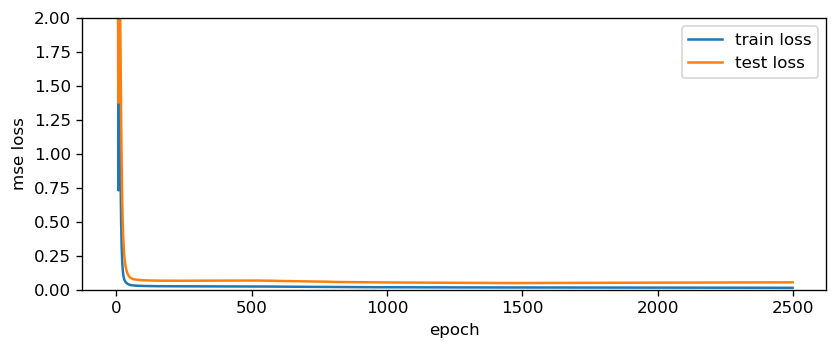

In [44]:
plt.figure(figsize=(8,3), dpi=120)
plt.plot(loss_train_array)
plt.plot(loss_test_array)
plt.legend(['train loss', 'test loss'])
plt.xlabel('epoch')
plt.ylabel('mse loss')
plt.ylim([0,2])
plt.show()

In [45]:
loss_train_array[-1], loss_test_array[-1]

(array(0.0135907, dtype=float32), array(0.05411568, dtype=float32))

# Training and testing for each cordinate

In [46]:
model.eval()
df_test['Pred'] = model(X_test).detach().numpy()
df_train['Pred'] = model(X_train).detach().numpy()



In [47]:
df_train.head()

,lat,lon,year_month,inj_vol,pp,prev_mu,mu,Pred
0,96.8,36.4,2013.75,"[[1.27961, 0.0, 1.04539, 1.39446, 0.0], [1.641...","[[4.7918579999999995, 0.0, 3.998961, 13.706794...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.06149,0.055444
1,96.8,36.4,2013.83,"[[1.64186, 0.0, 1.35435, 1.53389, 0.0], [1.484...","[[6.694805000000001, 0.0, 5.03317, 13.989468, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.06149,0.054022
2,96.8,36.4,2013.92,"[[1.48419, 0.0, 1.22722, 1.64158, 0.0], [1.232...","[[6.784442, 0.0, 5.17107, 13.589576000000001, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.06149,0.060850
3,96.8,36.4,2014.00,"[[1.2328, 0.0, 1.2093, 0.879274, 0.0], [1.1951...","[[6.9361299999999995, 0.0, 5.8329699999999995,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.06149,0.085065
4,96.8,36.4,2014.08,"[[1.19517, 0.0, 1.21349, 0.907414, 0.0], [1.42...","[[6.97061, 0.0, 5.8329699999999995, 13.237946,...","[nan, nan, nan, nan, nan, nan, nan, nan, 0.061...",0.06149,0.093216


In [48]:

loss_co_ord = OrderedDict()
for co_ord, df_c in df_test.groupby(['lat','lon']):
    loss = (df_c['Pred'] - df_c[PRED_COLUMN])**2
    loss_co_ord[str(co_ord)] = loss
    # loss_co_ord.append(loss.detach().item())

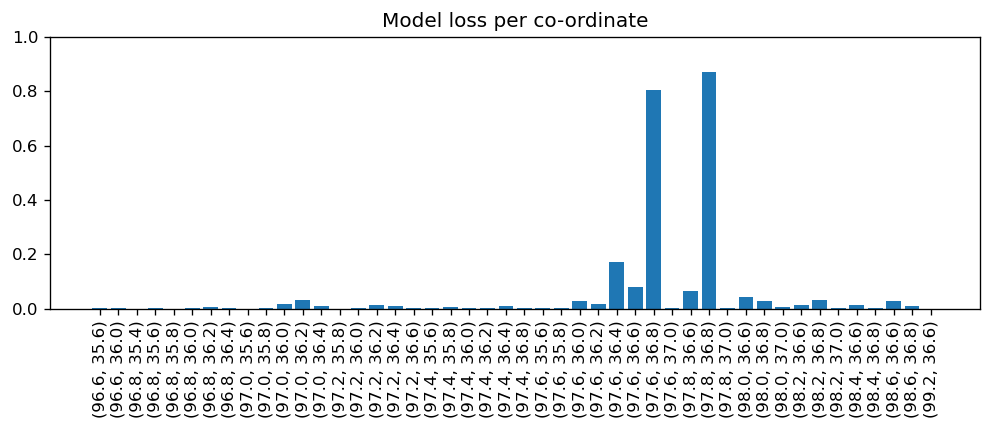

In [49]:
plt.figure(figsize=(10,3), dpi=120)
plt.bar(loss_co_ord.keys(), [x.mean() for x in loss_co_ord.values()])
# notch shape box plot
# plt.boxplot(loss_co_ord.values(),
#                      notch=True,  # notch shape
#                      vert=True,  # vertical box alignment
#                      patch_artist=True,  # fill with color
#                      labels=loss_co_ord.keys())  # will be used to label x-ticks
plt.ylim([0,1])
plt.xticks(rotation=90)
plt.title('Model loss per co-ordinate')
plt.show()

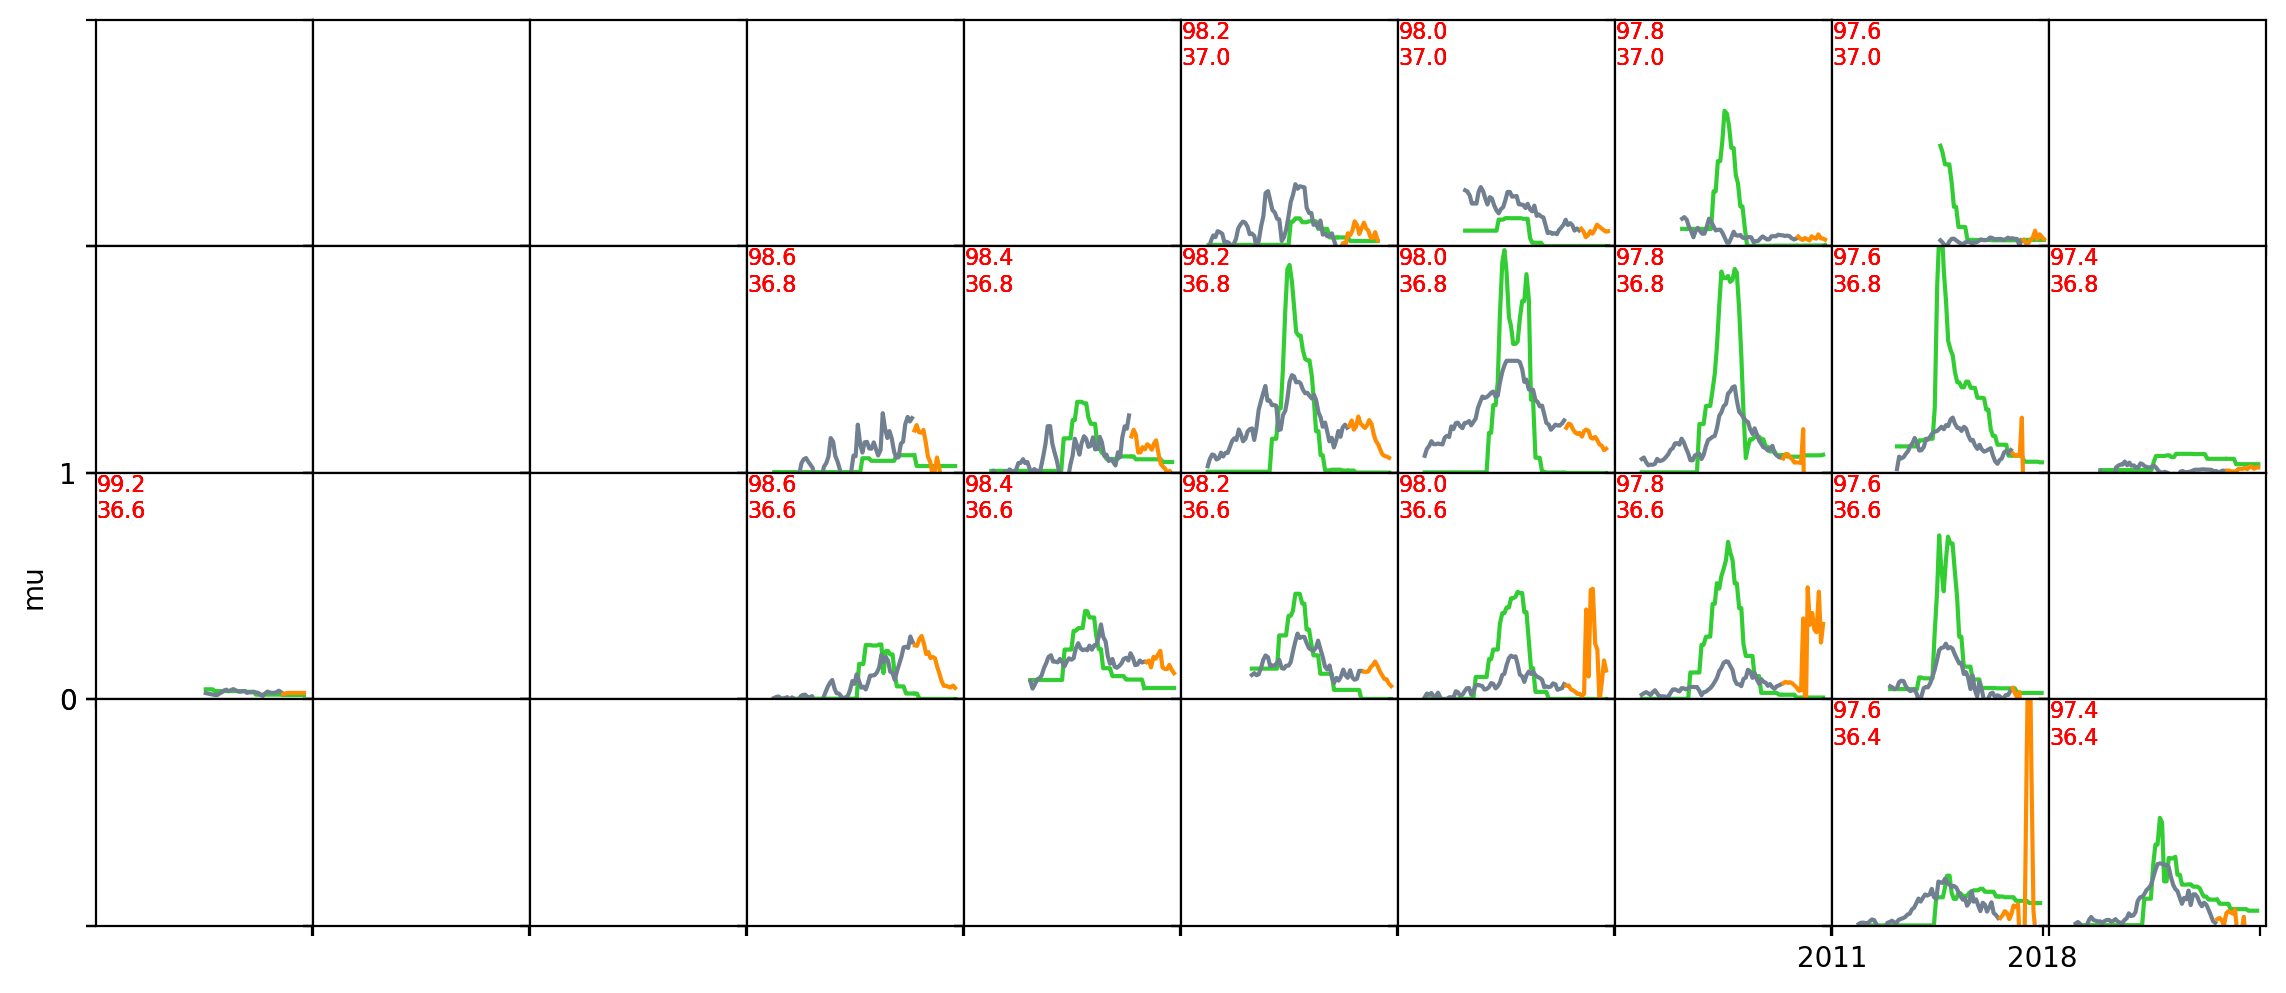

In [51]:
fig, axes = plt.subplots(4, 10, sharex=False, sharey=False, figsize=(14,6), dpi=200)
axes = axes.ravel()



def plot_pred(axes, df_pred, column, color):
    max_data = 1
    df_pred = df_pred.groupby(['lat','lon'])
    
    ax_idx = 0
    init=False
    for lon in np.arange(37.0, 36.2, -0.2):
        for lat in np.arange(99.2, 97.2, -0.2):
            ax = axes[ax_idx]
            lat_s = "%3.1f"%(lat)
            lon_s = "%3.1f"%(lon)
            # get df for given lat lon
            try:
                df = df_pred.get_group((round(lat,1),round(lon,1)))
                ax.plot(df.year_month,df[column], color)
                ax.text(2011.00, max_data - 0.2, '%s\n%s'%(lat_s, lon_s), fontsize=8, color='r')
            except KeyError as e:
                pass
                # print('Key error %s'%(e))

            # set injection volume limit
            ax.set_ylim([0, max_data])
            yticks = np.linspace(0, max_data, 3).astype('int')
            ax.set_yticks(yticks)
            ax.set_xticks([2011.00, 2018.92])
            
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            # injection volume y axis label
            if lat_s == "99.2" and lon_s == "36.6":
                ax.set_yticklabels(yticks, color='k')
                ax.set_ylabel(PRED_COLUMN, color='k')

            if lat_s == "97.6" and lon_s == "36.4":
                ax.set_xticklabels([2011, 2018])
            
            ax_idx += 1

plot_pred(axes, df_train, PRED_COLUMN, 'limegreen')
plot_pred(axes, df_train, 'Pred', 'slategrey')

plot_pred(axes, df_test, PRED_COLUMN, 'limegreen')
plot_pred(axes, df_test, 'Pred', 'darkorange')





# fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()